In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/jacobcastiglioni/Desktop/machine-learning-ex2/ex2/ex2data1.txt', header=None)
data = data.as_matrix()

In [38]:
y = data[:,2:3]
#X = data[:,0:2]-np.mean(data[:,0:2])/np.std(data[:,0:2])
X = data[:,0:2]/100
X[0:10,:]

array([[ 0.3462366 ,  0.78024693],
       [ 0.30286711,  0.43894998],
       [ 0.35847409,  0.72902198],
       [ 0.60182599,  0.86308552],
       [ 0.79032736,  0.75344376],
       [ 0.45083277,  0.56316372],
       [ 0.61106665,  0.96511426],
       [ 0.75024746,  0.46554014],
       [ 0.76098787,  0.8742057 ],
       [ 0.8443282 ,  0.43533393]])

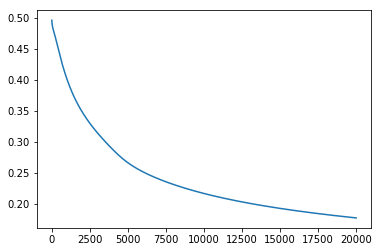

In [39]:
np.random.seed(1)
# X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
# y = np.array([[0,1,1,0]]).T
syn0 = 2*np.random.random((2,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1
costs = []
alpha = .01
for j in range(20000):
    l1 = 1/(1+np.exp(-(np.dot(X,syn0))))
    l2 = 1/(1+np.exp(-(np.dot(l1,syn1))))
    
    l2_error = y - l2
    
    
    costs.append((np.asscalar((np.mean(np.abs(l2_error))))))
    
    l2_delta = (y - l2)*(l2*(1-l2))
    l1_delta = l2_delta.dot(syn1.T) * (l1 * (1-l1))
    
    syn1 += alpha*(l1.T.dot(l2_delta))
    syn0 += alpha*(X.T.dot(l1_delta))
plt.plot(costs)